# **🌱 EPOCH 비기너 세션 4주차 복습문제**



---



## **1️⃣ 'market_2017.csv' 파일과 'market_2022.csv' 파일을 불러와 상가 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [30]:
from pandas import DataFrame
import pandas as pd
data_2017 = pd.read_csv("market_2017.csv")
data_2022 = pd.read_csv("market_2022.csv")
df1 = DataFrame(data_2017)
df2 = DataFrame(data_2022)
print(df1.columns)
print(df1.head(5))

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드', '시도명', '시군구코드',
       '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드', '경도', '위도'],
      dtype='object')
     상가업소번호         상호명 상권업종대분류코드  상권업종대분류명 상권업종중분류코드  상권업종중분류명 상권업종소분류코드  \
0  20741628     행운노래연습장         N  관광/여가/오락       N02  무도/유흥/가무    N02A01   
1  20594635        유림식당         Q        음식       Q01        한식    Q01A01   
2  15551341  대동석유압구정주유소         F     생활서비스       F16   주유소/충전소    F16A01   
3  20536992       이삭토스트         Q        음식       Q07     패스트푸드    Q07A10   
4  20537010     씨유수유빨래골         D        소매       D03     종합소매점    D03A01   

    상권업종소분류명 표준산업분류코드                  표준산업분류명  ...    시도명  시군구코드  시군구명  \
0        노래방   R91223                노래연습장 운영업  ...  서울특별시  11230  동대문구   
1  한식/백반/한정식   I56111                  한식 음식점업  ...  서울특별시  11380   은평구   
2        주유소   G47711              차량용 주유소 운영업  ...  서울특별시  11680  

### (1) 2017년도에는 존재했는데 2022년도에 사라진 편의점의 개수를 출력하세요.
* Hint: count()

In [31]:
df_2017 = df1[df1["상권업종소분류명"]=="편의점"]
df_2022 = df2[df2["상권업종소분류명"]=="편의점"]
merged = pd.merge(df_2017, df_2022, on="상가업소번호", how="left", suffixes=("_2017","_2022"))
print(merged["상호명_2022"].isna().sum())

1583


### (2) 2017년과 2022년 데이터를 비교하여, 서울특별시(시도명: "서울특별시") 내에서 위치 변경이 있었던 업소들을 찾으세요. 위치 변경 여부는 경도와 위도의 변화로 판단하고, 상호명과 변화된 위치(경도, 위도) 차이를 '경도차이', '위도차이' 열을 새로 생성하여 출력하세요. (경도차이, 위도차이는 절댓값으로 출력되지 않아도 됩니다.)
* Hint: 비교 연산자 사용 (|, =! 등)

In [32]:
df2017_seoul = df1[df1["시도명"] == "서울특별시"]
df2022_seoul = df2[df2["시도명"] == "서울특별시"]
merged = pd.merge(df2017_seoul, df2022_seoul, on="상가업소번호",suffixes=("_2017","_2022"))
merged["경도차이"] = merged["경도_2022"] - merged["경도_2017"]
merged["위도차이"] = merged["위도_2022"] - merged["위도_2017"]
changed_location = merged[(merged["경도차이"] != 0) | (merged["위도차이"] != 0)]
changed_location[["상호명_2017", "경도차이", "위도차이"]]

,상호명_2017,경도차이,위도차이
264,Mr박의돈워리,-1.961900e-03,0.000272
301,1등공인중개사사무소,5.460000e-04,-0.000184
356,좋은집부동산,-1.140000e-05,0.000009
398,삼보상회,1.734000e-04,-0.000278
486,교촌치킨,1.018000e-04,0.000010
...,...,...,...
243983,휠라,-4.500000e-06,0.000324
244182,씨씨콜렉트,-2.676700e-03,-0.000345
244283,신세계공인중개사사무소,-7.354000e-04,0.000012
244358,보은흑염소탕,8.000000e-07,-0.000054


## **2️⃣‘movie_data.csv’ 파일을 불러와 영화 데이터를 시각화하세요.**

### (0) 데이터를 불러오세요.

In [33]:
data = pd.read_csv("movies.csv")
df = DataFrame(data)
df

,name,rating,genre,year,score,votes,country,budget,gross,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,United Kingdom,19000000.0,46998772.0,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,United States,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,United States,18000000.0,538375067.0,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,United States,3500000.0,83453539.0,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,United States,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,United States,7000.0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,United States,NaN,NaN,90.0
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,United States,58750.0,NaN,NaN
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,United States,15000.0,NaN,120.0


### (1) 아래와 같은 평점('score') 상위 10개 영화의 관객 수에 대한 수평 막대 그래프를 그리세요.
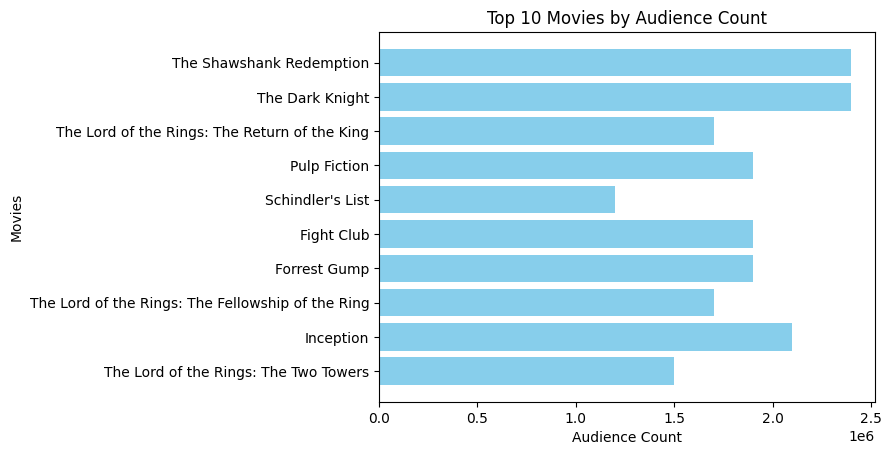

[]

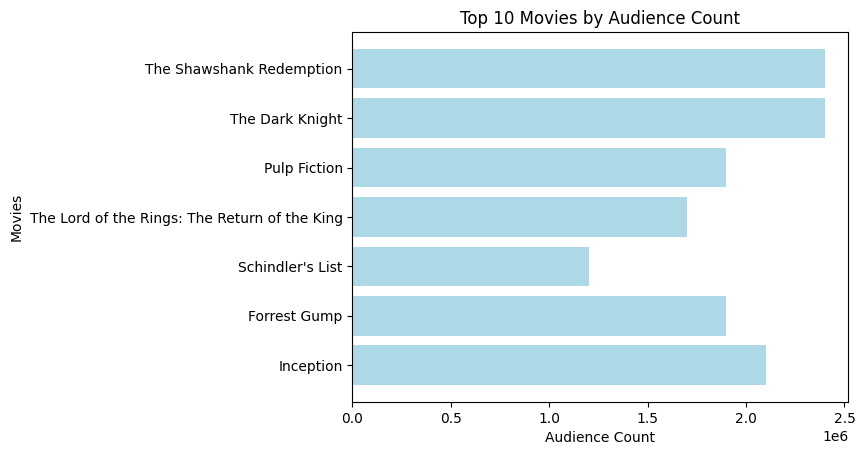

In [34]:
import matplotlib.pyplot as plt
import numpy as np
df_top10 = df.sort_values('score').tail(10) # 왜 7개만 출력이 되는 지 모르겠음
plt.barh(df_top10['name'], df_top10['votes'],color="lightblue")
plt.xlabel("Audience Count")
plt.ylabel("Movies")
plt.title("Top 10 Movies by Audience Count")
plt.plot()

[]

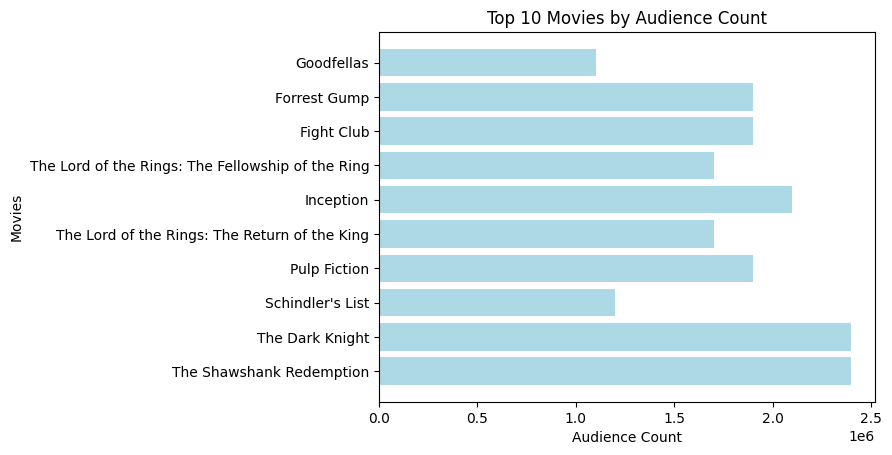

In [35]:
import matplotlib.pyplot as plt
import numpy as np
df_top10 = df.sort_values('score', ascending=False).head(10)
plt.barh(df_top10['name'], df_top10['votes'],color="lightblue")
plt.xlabel("Audience Count")
plt.ylabel("Movies")
plt.title("Top 10 Movies by Audience Count")
plt.plot()

### (2) 아래와 같이 연도('year')별 평균 예산('budget')과 수익('gross')을 선 그래프로 나타내세요.
(사용한 색상은 b, forestgreen, orange, skyblue 입니다.)

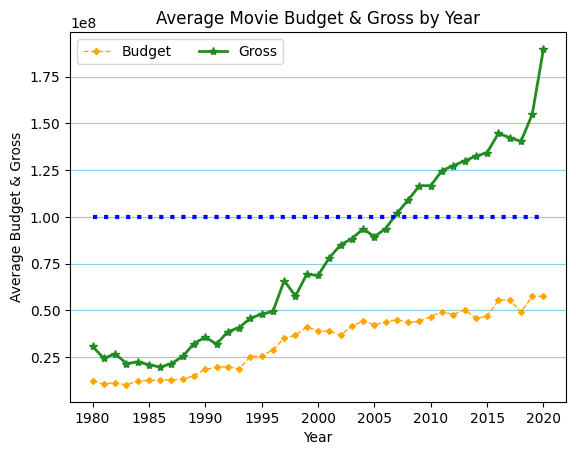

ValueError: xmin must be a single scalar value, but got :

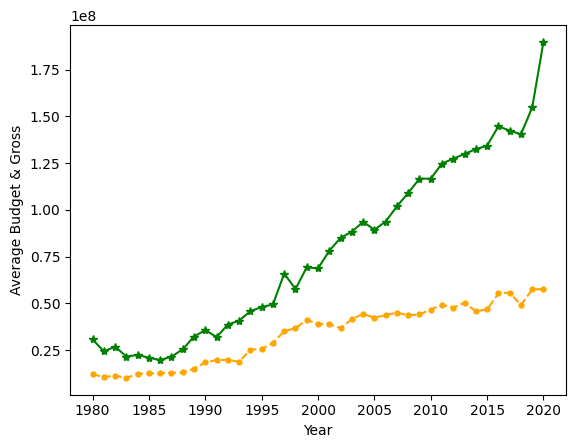

In [ ]:
plt.xlabel("Year")
plt.ylabel("Average Budget & Gross")
plt.plot(df.groupby("year")["budget"].mean(),linestyle="--", color="orange", marker="o", markersize=3.5)
plt.plot(df.groupby("year")["gross"].mean(), color="green", marker="*")
ymin, ymax = plt.ylim()
plt.axhline((ymin + ymax) / 2, color="blue", ":")


In [39]:
df.groupby("year")["budget"].mean()

year
1980    1.210319e+07
1981    1.043309e+07
1982    1.130635e+07
1983    1.004467e+07
1984    1.226732e+07
1985    1.245418e+07
1986    1.252265e+07
1987    1.280132e+07
1988    1.301158e+07
1989    1.499800e+07
1990    1.834073e+07
1991    1.955386e+07
1992    1.976401e+07
1993    1.864826e+07
1994    2.519732e+07
1995    2.550240e+07
1996    2.878181e+07
1997    3.504097e+07
1998    3.665950e+07
1999    4.111549e+07
2000    3.889724e+07
2001    3.883313e+07
2002    3.662213e+07
2003    4.149956e+07
2004    4.428688e+07
2005    4.229114e+07
2006    4.363841e+07
2007    4.500325e+07
2008    4.352750e+07
2009    4.399123e+07
2010    4.666311e+07
2011    4.917956e+07
2012    4.771347e+07
2013    5.032093e+07
2014    4.573190e+07
2015    4.668233e+07
2016    5.526101e+07
2017    5.571203e+07
2018    4.904182e+07
2019    5.740129e+07
2020    5.753105e+07
Name: budget, dtype: float64

In [ ]:
df

,name,rating,genre,year,score,votes,country,budget,gross,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,United Kingdom,19000000.0,46998772.0,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,United States,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,United States,18000000.0,538375067.0,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,United States,3500000.0,83453539.0,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,United States,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,United States,7000.0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,United States,NaN,NaN,90.0
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,United States,58750.0,NaN,NaN
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,United States,15000.0,NaN,120.0
